# K-Mean Clustering

In [1]:
from sentence_transformers import SentenceTransformer

In [2]:
from sklearn.cluster import KMeans

In [3]:
model=SentenceTransformer('all-MiniLM-L6-v2')

In [4]:
import requests

In [5]:
response=requests.get('https://raw.githubusercontent.com/laxmimerit/machine-learning-dataset/master/text-dataset-for-machine-learning/sbert-corpus.txt')

In [6]:
corpus=response.text.split('\r\n')

In [7]:
corpus

['A man is eating food.',
 'A man is eating a piece of bread.',
 'A man is eating pasta.',
 'The girl is carrying a baby.',
 'The baby is carried by the woman',
 'A man is riding a horse.',
 'A man is riding a white horse on an enclosed ground.',
 'A monkey is playing drums.',
 'Someone in a gorilla costume is playing a set of drums.',
 'A cheetah is running behind its prey.',
 'A cheetah chases prey on across a field.']

In [8]:
len(corpus)

11

In [9]:
#Applying K mean clustering on corpus data
corpus_embeddings=model.encode(corpus)

In [10]:
num_clusters=5
clustering_model=KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment=clustering_model.labels_

C:\Users\mmanasanjani\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mmanasanjani\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
cluster_assignment

array([2, 2, 2, 0, 0, 3, 3, 4, 4, 1, 1])

In [12]:
clustered_sentences=[[]for i in range(num_clusters)]

In [13]:
clustered_sentences

[[], [], [], [], []]

In [14]:
for sentence_id,cluster_id in enumerate(cluster_assignment): #enumerate--> to give sentence id
    clustered_sentences[cluster_id].append(corpus[sentence_id])

In [15]:
for i,cluster in enumerate(clustered_sentences):
    print("Cluster:",i+1)
    print(cluster)
    print()

Cluster: 1
['The girl is carrying a baby.', 'The baby is carried by the woman']

Cluster: 2
['A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']

Cluster: 3
['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.']

Cluster: 4
['A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.']

Cluster: 5
['A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.']



# Text Clustering/Agglomeration Clustering on Text Data

- It is a type of hierarchical clustering. The hierarchical clustering analysis is a method of cluster analysis that seeks to build a hierarchy of clusters i.e. tree-type structure based on the hierarchy.
- 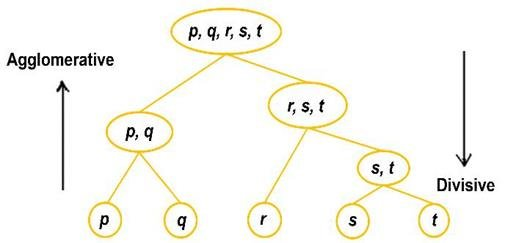
- It is known as bottom-up approach or hierarchical agglomerative clustering (HAC)
- In contrast to k-means, we can specify a threshold for the clustering.
- It is useful if the number of clusters is unknown

In [16]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [17]:
model=SentenceTransformer('all-MiniLM-L6-v2')

In [18]:
import requests
response = requests.get('https://raw.githubusercontent.com/laxmimerit/machine-learning-dataset/master/text-dataset-for-machine-learning/sbert-corpus.txt')
corpus = response.text.split('\r\n')

In [19]:
corpus

['A man is eating food.',
 'A man is eating a piece of bread.',
 'A man is eating pasta.',
 'The girl is carrying a baby.',
 'The baby is carried by the woman',
 'A man is riding a horse.',
 'A man is riding a white horse on an enclosed ground.',
 'A monkey is playing drums.',
 'Someone in a gorilla costume is playing a set of drums.',
 'A cheetah is running behind its prey.',
 'A cheetah chases prey on across a field.']

In [20]:
corpus_embeddings=model.encode(corpus)

In [21]:
#doing non-linearization
corpus_embeddings=corpus_embeddings/np.linalg.norm(corpus_embeddings,axis=1,keepdims=True) #linear algorithm normalization, axis=1--> for each subset,keep dimensions same as earlier

In [22]:
clustering_model=AgglomerativeClustering(n_clusters=None,distance_threshold=1.5) #none-as its not known, number of clusters is none, euclidian affinity, can use other affinities like cosine similarity/manhattan distance
clustering_model.fit(corpus_embeddings)

AgglomerativeClustering(distance_threshold=1.5, n_clusters=None)

In [23]:
cluster_assignment=clustering_model.labels_

In [24]:
cluster_assignment

array([0, 0, 0, 4, 4, 1, 1, 2, 2, 3, 3], dtype=int64)

In [25]:
#number of clusters should be unique values in the cluster assignment
num_clusters=len(np.unique(cluster_assignment))

In [26]:
clustered_sentences=[[]for i in range(num_clusters)]

In [27]:
clustered_sentences

[[], [], [], [], []]

In [28]:
for sentence_id,cluster_id in enumerate(cluster_assignment): #enumerate--> to give sentence id
    clustered_sentences[cluster_id].append(corpus[sentence_id])

In [29]:
for i,cluster in enumerate(clustered_sentences):
    print("Cluster:",i+1)
    print(cluster)
    print()

Cluster: 1
['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.']

Cluster: 2
['A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.']

Cluster: 3
['A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.']

Cluster: 4
['A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']

Cluster: 5
['The girl is carrying a baby.', 'The baby is carried by the woman']



In [30]:
#updating distance threshold to minimum value
clustering_model=AgglomerativeClustering(n_clusters=None,distance_threshold=0.1)
clustering_model.fit(corpus_embeddings)

AgglomerativeClustering(distance_threshold=0.1, n_clusters=None)

In [31]:
cluster_assignment=clustering_model.labels_

In [32]:
cluster_assignment

array([ 8,  7,  5,  9, 10,  3,  6,  2,  4,  1,  0], dtype=int64)

In [33]:
#number of clusters should be unique values in the cluster assignment
num_clusters=len(np.unique(cluster_assignment))

In [34]:
clustered_sentences=[[]for i in range(num_clusters)]

In [35]:
clustered_sentences

[[], [], [], [], [], [], [], [], [], [], []]

In [36]:
for sentence_id,cluster_id in enumerate(cluster_assignment): #enumerate--> to give sentence id
    clustered_sentences[cluster_id].append(corpus[sentence_id])

In [37]:
for i,cluster in enumerate(clustered_sentences):
    print("Cluster:",i+1)
    print(cluster)
    print()

Cluster: 1
['A cheetah chases prey on across a field.']

Cluster: 2
['A cheetah is running behind its prey.']

Cluster: 3
['A monkey is playing drums.']

Cluster: 4
['A man is riding a horse.']

Cluster: 5
['Someone in a gorilla costume is playing a set of drums.']

Cluster: 6
['A man is eating pasta.']

Cluster: 7
['A man is riding a white horse on an enclosed ground.']

Cluster: 8
['A man is eating a piece of bread.']

Cluster: 9
['A man is eating food.']

Cluster: 10
['The girl is carrying a baby.']

Cluster: 11
['The baby is carried by the woman']



In [38]:
#updating distance threshold to 2.5 value
clustering_model=AgglomerativeClustering(n_clusters=None,distance_threshold=2.5)
clustering_model.fit(corpus_embeddings)

AgglomerativeClustering(distance_threshold=2.5, n_clusters=None)

In [39]:
cluster_assignment=clustering_model.labels_

In [40]:
cluster_assignment

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [41]:
#number of clusters should be unique values in the cluster assignment
num_clusters=len(np.unique(cluster_assignment))

In [42]:
clustered_sentences=[[]for i in range(num_clusters)]

In [43]:
clustered_sentences

[[]]

In [44]:
for sentence_id,cluster_id in enumerate(cluster_assignment): #enumerate--> to give sentence id
    clustered_sentences[cluster_id].append(corpus[sentence_id])

In [45]:
for i,cluster in enumerate(clustered_sentences):
    print("Cluster:",i+1)
    print(cluster)
    print()

Cluster: 1
['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.', 'The girl is carrying a baby.', 'The baby is carried by the woman', 'A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.', 'A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.', 'A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']



In [46]:
#updating distance threshold to 2 value
clustering_model=AgglomerativeClustering(n_clusters=None,distance_threshold=2)
clustering_model.fit(corpus_embeddings)

AgglomerativeClustering(distance_threshold=2, n_clusters=None)

In [47]:
cluster_assignment=clustering_model.labels_

In [48]:
cluster_assignment

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [49]:
#number of clusters should be unique values in the cluster assignment
num_clusters=len(np.unique(cluster_assignment))

In [50]:
clustered_sentences=[[]for i in range(num_clusters)]

In [51]:
clustered_sentences

[[], []]

In [52]:
for sentence_id,cluster_id in enumerate(cluster_assignment): #enumerate--> to give sentence id
    clustered_sentences[cluster_id].append(corpus[sentence_id])

In [53]:
for i,cluster in enumerate(clustered_sentences):
    print("Cluster:",i+1)
    print(cluster)
    print()

Cluster: 1
['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.', 'A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.', 'A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.', 'A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']

Cluster: 2
['The girl is carrying a baby.', 'The baby is carried by the woman']



# Fast Clustering

- Agglomerative: only for few datasets
- Fast: 50,000 datasets in few seconds
- Quora duplicate questions dataset will be used: https://quoradata.quora.com/First-Quora-Dataset-Release-Question-Pairs

In [54]:
from sentence_transformers import SentenceTransformer,util

In [55]:
import pandas as pd
import time

In [56]:
model=SentenceTransformer('all-MiniLM-L6-v2')

In [63]:
#df = pd.read_csv('http://qim.fs.quoracdn.net/quora_duplicate_questions.tsv', sep='\t')
#getting 403 forbidden error in above code, so downloaded, accessing it
df = pd.read_csv(r'C:\Users\mmanasanjani\Desktop\Extra\MK\AMLDLP\quora_duplicate_questions.tsv', sep='\t')
df.shape

(404290, 6)

In [64]:
df.head

<bound method NDFrame.head of             id    qid1    qid2  \
0            0       1       2   
1            1       3       4   
2            2       5       6   
3            3       7       8   
4            4       9      10   
...        ...     ...     ...   
404285  404285  433578  379845   
404286  404286   18840  155606   
404287  404287  537928  537929   
404288  404288  537930  537931   
404289  404289  537932  537933   

                                                question1  \
0       What is the step by step guide to invest in sh...   
1       What is the story of Kohinoor (Koh-i-Noor) Dia...   
2       How can I increase the speed of my internet co...   
3       Why am I mentally very lonely? How can I solve...   
4       Which one dissolve in water quikly sugar, salt...   
...                                                   ...   
404285  How many keywords are there in the Racket prog...   
404286          Do you believe there is life after death?   
404287      

In [65]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [66]:
#hitting 1000 sentence pairs and then doing clusterings accordingly
sentences = df['question1'].tolist()[:1000]
len(sentences)

1000

In [67]:
corpus_embeddings = model.encode(sentences, batch_size=64, show_progress_bar=True)

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

In [68]:
clusters = util.community_detection(corpus_embeddings, min_community_size=5, threshold=0.5) #utility function->community detection
#atleast 5 community samples

In [72]:
clusters #14 clusters

[[304, 777, 870, 723, 978, 688, 92, 919, 607, 103],
 [439, 675, 321, 295, 689, 199, 877, 907, 105],
 [28, 78, 945, 284, 647, 564, 784, 273],
 [725, 733, 549, 726, 79, 590, 299],
 [140, 618, 287, 669, 598, 100],
 [263, 544, 93, 930, 401, 957],
 [644, 72, 969, 686, 364, 198],
 [734, 973, 752, 722, 895, 384],
 [49, 566, 967, 591, 302],
 [63, 3, 115, 218, 910],
 [233, 333, 425, 422, 419],
 [502, 532, 608, 852, 317],
 [540, 219, 703, 742, 858],
 [796, 996, 926, 612, 175]]

In [71]:
for i,cluster in enumerate(clusters):
    print("\nCluster {}, #{} Questions".format(i+1, len(cluster)))
    for id in cluster[0:3]: #printing top 3 questions from each cluster
        print("\t", sentences[id])
    print("\t", "...")


Cluster 1, #10 Questions
	 Which are the best Hollywood thriller movies?
	 What are the most underrated and overrated movies you've seen?
	 What are the best films that take place in one room?
	 ...

Cluster 2, #9 Questions
	 What are your views on Modi governments decision to demonetize 500 and 1000 rupee notes? How will this affect economy?
	 What's your opinion about the decision on removal of 500 and 1000 rupees currency notes?
	 How will Indian GDP be affected from banning 500 and 1000 rupees notes?
	 ...

Cluster 3, #8 Questions
	 What is best way to make money online?
	 How can I make money through the Internet?
	 What are the easy ways to earn money online?
	 ...

Cluster 4, #7 Questions
	 What are the most important things for living a good life?
	 What is most important in life - money or values?
	 What is the best lesson in life?
	 ...

Cluster 5, #6 Questions
	 What is our stance against Pakistan?
	 What is the reason Pakistan supports terrorism?
	 If there will be a war b